In [1]:
# I have received a bunch of wedding invitations recently.
# Frequently they will come with a little card that you can 
# send back to recommend a song be played at the reception

# I usually don't respond with a song, as I don't think DJs change
# their setlist for just anybody. It may take a special kind of song to get their attention.

# I have a dataset that I got from Kaggle. It's a list of songs with various metrics about them.
# First, let's ask some questions:

In [2]:
# 1. What are the most well-liked songs?
# 2. What songs are most likely to get people up and dancing? Everyone hates a lazy crowd.

In [3]:
# Importing os to be able to change the working directory
# Importing pandas to read in the csv file
import pandas as pd
import os

In [4]:
# Updating the working directory
path = "****"
os.chdir(path)

In [5]:
# Read in the csv file and show the top five rows.
songs = pd.read_csv("Spotify_Youtube.csv")
songs.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
# "I'm in love with the shape of [this dataset]"
rows = songs.shape[0]
cols = songs.shape[1]

print(f"Rows: {rows}\nColumns: {cols}")

Rows: 20718
Columns: 28


In [7]:
# Remove songs that are duplicates based on title
songs = songs.drop_duplicates(subset=['Title'])
rows = songs.shape[0]
cols = songs.shape[1]

print(f"Rows: {rows}\nColumns: {cols}")

Rows: 18147
Columns: 28


In [79]:
songs.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [85]:
songs = songs.fillna(0)
songs['Views'] = songs['Views'].astype('int')
songs['Likes'] = songs['Likes'].astype('int')
songs['Comments'] = songs['Comments'].astype('int')
songs['Stream'] = songs['Stream'].astype('int')

In [86]:
# Looking at the columns and their types. Everything looks good.
songs.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views                 int64
Likes                 int64
Comments              int64
Description          object
Licensed             object
official_video       object
Stream                int64
dtype: object

In [87]:
# Create a subset of the top ten most-liked songs (music videos) on YouTube
most_likes = songs.nlargest(n=10, columns=['Likes'])
most_likes.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
365,365,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8079646911,50788626,4252791,“Despacito” disponible ya en todas las platafo...,True,True,1506598267
12469,12469,Wiz Khalifa,https://open.spotify.com/artist/137W8MRPWKqSmr...,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.481,10.0,...,https://www.youtube.com/watch?v=RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5773797147,40147618,2127345,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1521254554
14561,14561,BTS,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,Dynamite,BE,album,spotify:track:5QDLhrAOJJdNAmCTJ8xMyW,0.746,0.765,6.0,...,https://www.youtube.com/watch?v=gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,HYBE LABELS,1640945859,35892575,16083138,BTS (방탄소년단) 'Dynamite' Official MV\n\n\nCredit...,True,True,1582446481
12452,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,...,https://www.youtube.com/watch?v=JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5908398479,31047780,1130327,The official music video for Ed Sheeran - Shap...,True,True,3362005201
14565,14565,BTS,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,Boy With Luv (feat. Halsey),MAP OF THE SOUL : PERSONA,album,spotify:track:4a9tbd947vo9K8Vti9JwcI,0.645,0.862,11.0,...,https://www.youtube.com/watch?v=XsX3ATc3FbA,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,HYBE LABELS,1634109865,27588189,6535721,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (Feat....,True,True,989478029


In [88]:
# Create a subset of the top ten most-viewed music videos
most_views = songs.nlargest(n=10, columns=['Views'])
most_views.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
365,365,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8079646911,50788626,4252791,“Despacito” disponible ya en todas las platafo...,True,True,1506598267
12452,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,...,https://www.youtube.com/watch?v=JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5908398479,31047780,1130327,The official music video for Ed Sheeran - Shap...,True,True,3362005201
12469,12469,Wiz Khalifa,https://open.spotify.com/artist/137W8MRPWKqSmr...,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.481,10.0,...,https://www.youtube.com/watch?v=RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5773797147,40147618,2127345,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1521254554
20303,20303,CoComelon,https://open.spotify.com/artist/6SXTTUJxIVwMbc...,Wheels on the Bus,"CoComelon Kids Hits, Vol. 1",album,spotify:track:6YQ7aPJhk0MGpwoKfFAEbS,0.941,0.387,9.0,...,https://www.youtube.com/watch?v=e_04ZrNroTo,Wheels on the Bus | CoComelon Nursery Rhymes &...,Cocomelon - Nursery Rhymes,4898831101,14396841,0,Bounce along in the bus all over town with thi...,True,True,83434355
10686,10686,Mark Ronson,https://open.spotify.com/artist/3hv9jJF3adDNsB...,Uptown Funk (feat. Bruno Mars),Uptown Special,album,spotify:track:32OlwWuMpZ6b0aN2RZOeMS,0.856,0.609,0.0,...,https://www.youtube.com/watch?v=OPf0YbXqDm0,Mark Ronson - Uptown Funk (Official Video) ft....,MarkRonsonVEVO,4821016218,20067879,598916,Official Video for Uptown Funk by Mark Ronson ...,True,True,1653819736


In [89]:
# Create a subset of the top ten most danceable songs.
most_dancy = songs.nlargest(n=10, columns=['Danceability'])
most_dancy.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
750,750,Timbaland,https://open.spotify.com/artist/5Y5TRrQiqgUO4S...,Give It To Me,Shock Value,album,spotify:track:0wbDgMuAoy7O7pL3a69uZx,0.975,0.711,8.0,...,https://www.youtube.com/watch?v=RgoiSJ23cSc,Timbaland - Give It To Me (Official Music Vide...,TimbalandVEVO,133147140,760396,17486,"Official music video for Timbaland's ""Give It ...",True,True,165286007
16555,16555,BIA,https://open.spotify.com/artist/6veh5zbFpm31Xs...,CAN'T TOUCH THIS,FOR CERTAIN (Deluxe),album,spotify:track:1LJYn86ysceH708AIkw0VZ,0.975,0.482,9.0,...,https://www.youtube.com/watch?v=4wKFIBmefiY,BIA - CAN'T TOUCH THIS (Official Music Video),BIAVEVO,4497077,97592,4035,BIA - CAN'T TOUCH THIS (Official Music Video)\...,True,True,24769336
18822,18822,Dave,https://open.spotify.com/artist/6Ip8FS7vWT1uKk...,Funky Friday,Funky Friday,single,spotify:track:01IQ4aQgOf0Kkq3a273hmO,0.975,0.535,1.0,...,https://www.youtube.com/watch?v=Pxns_n9q0f4,Dave - Funky Friday (ft. Fredo),Santan Dave,90501634,550331,14621,Stream & Download Psychodrama: https://SantanD...,False,False,172177751
8498,8498,Xavier Wulf,https://open.spotify.com/artist/3uo0ix4Y67XHVW...,Psycho Pass,Blood Shore Season 2,album,spotify:track:3kZAm2TC74lBJFPDoV40Qc,0.973,0.446,3.0,...,https://www.youtube.com/watch?v=cZJK2OVoCeo,"Xavier Wulf - ""Psycho Pass"" (Music Video)",XavierWulf,10256470,208438,5544,Hollow Squad\n\nProd. Prohibeo\n\nDirected/Edi...,False,False,109901131
1212,1212,Juicy J,https://open.spotify.com/artist/5gCRApTajqwbnH...,RIP Young (feat. Project Pat & Juicy J) - Remix,The House Is Burning [homies begged],album,spotify:track:6GUiCjtZGTvgUKKm1w9mwG,0.971,0.662,2.0,...,https://www.youtube.com/watch?v=_iDw1c_tUU8,Isaiah Rashad - RIP Young Remix (feat. Project...,Top Dawg Entertainment,3398625,69423,1913,"Isaiah Rashad feat. Project Pat & Juicy J\n""RI...",False,False,7701677


In [90]:
# Import more libraries that we may need.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missi

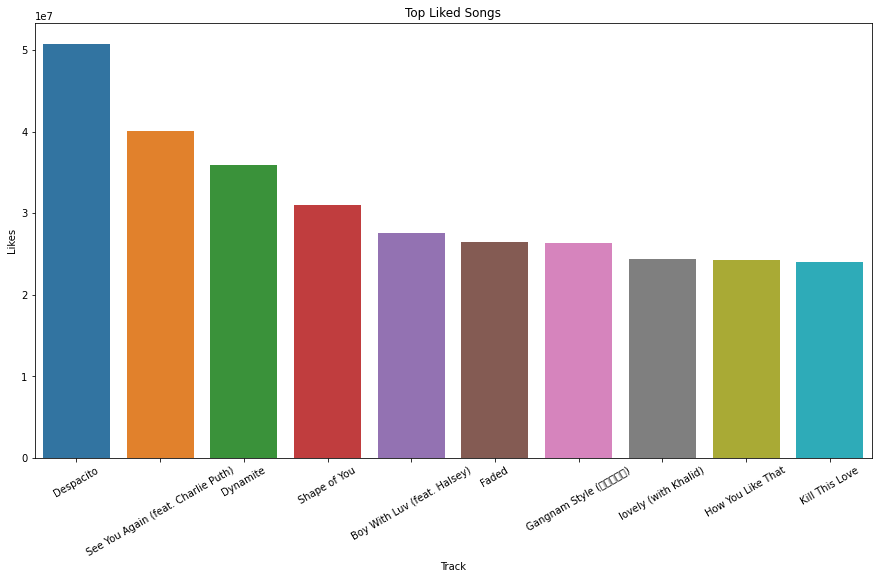

In [91]:
# Create a figure of the most-liked songs
plt.figure(figsize=(15,8))
sns.barplot(x = 'Track',y = 'Likes',data = most_likes).set(title='Top Liked Songs')
plt.xticks(rotation=30)
plt.show()

/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/herbieborek/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missi

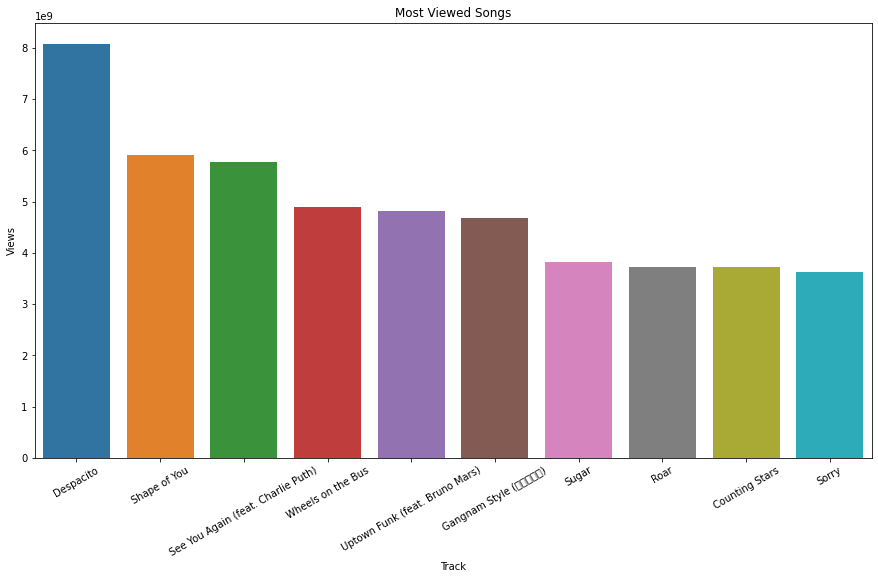

In [92]:
# Create a figure of the most-viewed songs.
plt.figure(figsize=(15,8))
sns.barplot(x = 'Track',y = 'Views',data = most_views).set(title='Most Viewed Songs')
plt.xticks(rotation=30)
plt.show()

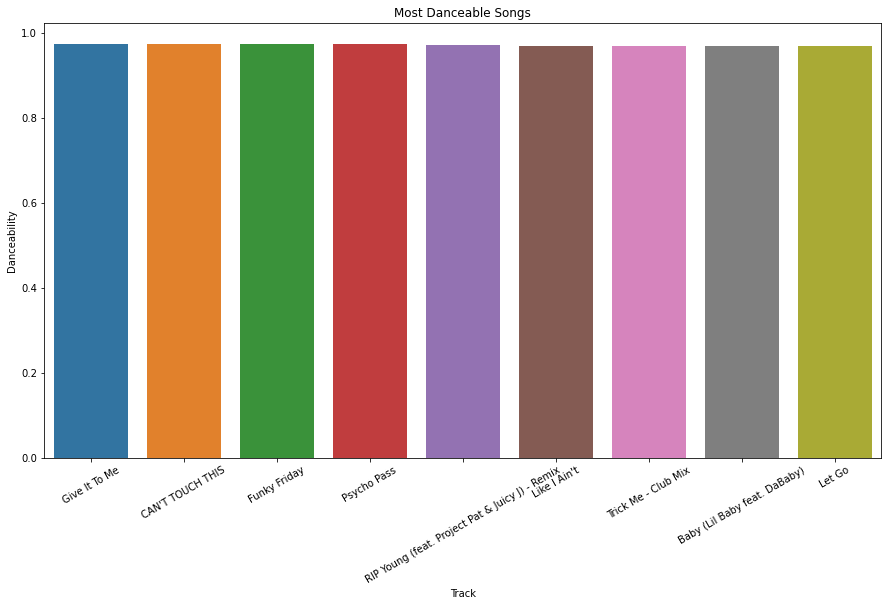

In [93]:
# Create a figure of the most-danceable songs
plt.figure(figsize=(15,8))
sns.barplot(x = 'Track',y = 'Danceability',data = most_dancy).set(title='Most Danceable Songs')
plt.xticks(rotation=30)
plt.show()

In [94]:
# Average the danceability by artist
artist_avg_dancy = songs.groupby(['Danceability','Artist'], as_index=False).mean()
artist_avg_dancy

,Danceability,Artist,Unnamed: 0,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.000,Lang Lang,9266.0,0.036200,0.0,-22.519,0.0000,0.99400,0.940000,0.0958,0.000,0.000,151507.0,185634.0,1796.0,20.0,11902123.0
1,0.000,Louis Armstrong,2073.0,0.405000,0.0,-9.935,0.0000,0.84200,0.001140,0.1980,0.000,0.000,147000.0,12691825.0,98026.0,4050.0,22358910.0
2,0.000,M83,8373.0,0.105000,7.0,-13.925,0.0000,0.98900,0.957000,0.1080,0.000,0.000,64840.0,50330.0,453.0,11.0,3387203.0
3,0.000,Natasha Bedingfield,11890.0,0.000000,0.0,0.000,0.0000,0.00000,0.000000,0.0000,0.000,0.000,0.0,21655597.0,165220.0,7780.0,110442210.0
4,0.000,Ocean Sounds,9348.0,0.000252,9.0,-17.746,0.0000,0.00948,0.877000,0.8060,0.000,0.000,93452.0,328.0,1.0,0.0,54256600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,0.971,Project Pat,3269.0,0.662000,2.0,-6.261,0.0708,0.04970,0.000000,0.0956,0.476,120.073,180000.0,253906.0,6096.0,218.0,7701677.0
17942,0.973,Xavier Wulf,8498.0,0.446000,3.0,-9.355,0.0612,0.03030,0.000017,0.1210,0.265,115.039,135340.0,10256470.0,208438.0,5544.0,109901131.0
17943,0.975,BIA,16555.0,0.482000,9.0,-7.940,0.2460,0.00716,0.000000,0.0596,0.737,125.953,146598.0,4497077.0,97592.0,4035.0,24769336.0
17944,0.975,Dave,18822.0,0.535000,1.0,-7.227,0.1960,0.07830,0.000000,0.1070,0.671,125.066,182741.0,90501634.0,550331.0,14621.0,172177751.0


In [95]:
# The artists with the highest average of danceability.
artist_avg_dancy[-10:]

,Danceability,Artist,Unnamed: 0,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
17936,0.969,Dina Rae,9891.0,0.511,1.0,-7.312,0.0882,0.08600,0.000001,0.0814,0.665,113.032,223317.0,2592.0,150.0,105.0,0.0
17937,0.970,DaBaby,18650.0,0.463,10.0,-7.259,0.3660,0.09570,0.000000,0.1510,0.460,108.003,142417.0,134859097.0,1184063.0,29249.0,389570923.0
17938,0.970,Kelis,7768.0,0.738,1.0,-3.381,0.1320,0.03690,0.000384,0.3240,0.961,107.166,206107.0,69063095.0,361019.0,6023.0,0.0
17939,0.970,Tech N9ne,2646.0,0.710,4.0,-5.262,0.1950,0.39300,0.000000,0.1380,0.777,116.030,222905.0,28236772.0,343002.0,11339.0,70676571.0
17940,0.971,Juicy J,1212.0,0.662,2.0,-6.261,0.0708,0.04970,0.000000,0.0956,0.476,120.073,180000.0,3398625.0,69423.0,1913.0,7701677.0
17941,0.971,Project Pat,3269.0,0.662,2.0,-6.261,0.0708,0.04970,0.000000,0.0956,0.476,120.073,180000.0,253906.0,6096.0,218.0,7701677.0
17942,0.973,Xavier Wulf,8498.0,0.446,3.0,-9.355,0.0612,0.03030,0.000017,0.1210,0.265,115.039,135340.0,10256470.0,208438.0,5544.0,109901131.0
17943,0.975,BIA,16555.0,0.482,9.0,-7.940,0.2460,0.00716,0.000000,0.0596,0.737,125.953,146598.0,4497077.0,97592.0,4035.0,24769336.0
17944,0.975,Dave,18822.0,0.535,1.0,-7.227,0.1960,0.07830,0.000000,0.1070,0.671,125.066,182741.0,90501634.0,550331.0,14621.0,172177751.0
17945,0.975,Timbaland,750.0,0.711,8.0,-3.904,0.0632,0.16800,0.000552,0.0799,0.815,110.621,234027.0,133147140.0,760396.0,17486.0,165286007.0


In [96]:
# Next, I'm going to create a couple of lists for comparing the most-liked, most-viewed, and most-danceable songs
liked_titles = []
n = 0

for i in most_likes['Title']:
    liked_titles.append(i)
    print(liked_titles[n])
    n += 1

Luis Fonsi - Despacito ft. Daddy Yankee
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack
BTS (방탄소년단) 'Dynamite' Official MV
Ed Sheeran - Shape of You (Official Music Video)
BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat. Halsey)' Official MV
Alan Walker - Faded
PSY - GANGNAM STYLE(강남스타일) M/V
Billie Eilish, Khalid - lovely
BLACKPINK - 'How You Like That' M/V
BLACKPINK - 'Kill This Love' M/V


In [97]:
viewed_titles = []
n = 0

for i in most_views['Title']:
    viewed_titles.append(i)
    print(viewed_titles[n])
    n += 1

Luis Fonsi - Despacito ft. Daddy Yankee
Ed Sheeran - Shape of You (Official Music Video)
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack
Wheels on the Bus | CoComelon Nursery Rhymes & Kids Songs
Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars
PSY - GANGNAM STYLE(강남스타일) M/V
Maroon 5 - Sugar (Official Music Video)
Katy Perry - Roar (Official)
OneRepublic - Counting Stars (Official Music Video)
Justin Bieber - Sorry (PURPOSE : The Movement)


In [98]:
danceable_titles = []
n = 0

for i in most_dancy['Title']:
    danceable_titles.append(i)
    print(danceable_titles[n])
    n += 1

Timbaland - Give It To Me (Official Music Video) ft. Nelly Furtado, Justin Timberlake
BIA - CAN'T TOUCH THIS (Official Music Video)
Dave - Funky Friday (ft. Fredo)
Xavier Wulf  - "Psycho Pass" (Music Video)
Isaiah Rashad - RIP Young Remix (feat. Project Pat & Juicy J) Visualizer
Isaiah Rashad - RIP Young Remix (feat. Project Pat & Juicy J) [Audio]
Tech N9ne - Like I Ain't - Official Music Video
Kelis - Trick Me
Quality Control, Lil Baby, & DaBaby - "Baby" (Official Music Video)
Dina Rae - Let Go - Official Music Video


In [99]:
# Let's check which songs are both in the most-liked and most-viewed lists.

# Looks like Despacito, See You Again, Shape of You, and Gangnam Style are in both.
n = 0

for i in liked_titles:
    Hybool = liked_titles[n] in viewed_titles
    print(f"{liked_titles[n]} is in the most viewed list: {Hybool}")
    n += 1

Luis Fonsi - Despacito ft. Daddy Yankee is in the most viewed list: True
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack is in the most viewed list: True
BTS (방탄소년단) 'Dynamite' Official MV is in the most viewed list: False
Ed Sheeran - Shape of You (Official Music Video) is in the most viewed list: True
BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat. Halsey)' Official MV is in the most viewed list: False
Alan Walker - Faded is in the most viewed list: False
PSY - GANGNAM STYLE(강남스타일) M/V is in the most viewed list: True
Billie Eilish, Khalid - lovely is in the most viewed list: False
BLACKPINK - 'How You Like That' M/V is in the most viewed list: False
BLACKPINK - 'Kill This Love' M/V is in the most viewed list: False


In [100]:
# Let's check if any of the most-liked songs are in the most-danceable list

n = 0

for i in liked_titles:
    Hybool = liked_titles[n] in danceable_titles
    print(f"{liked_titles[n]} is in the most danceable list: {Hybool}")
    n += 1

Luis Fonsi - Despacito ft. Daddy Yankee is in the most danceable list: False
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack is in the most danceable list: False
BTS (방탄소년단) 'Dynamite' Official MV is in the most danceable list: False
Ed Sheeran - Shape of You (Official Music Video) is in the most danceable list: False
BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat. Halsey)' Official MV is in the most danceable list: False
Alan Walker - Faded is in the most danceable list: False
PSY - GANGNAM STYLE(강남스타일) M/V is in the most danceable list: False
Billie Eilish, Khalid - lovely is in the most danceable list: False
BLACKPINK - 'How You Like That' M/V is in the most danceable list: False
BLACKPINK - 'Kill This Love' M/V is in the most danceable list: False


In [101]:
# Looks like not, but there were some songs that weren't in the most-liked songs but were in the most-viewed

n = 0

for i in viewed_titles:
    Hybool = viewed_titles[n] in danceable_titles
    print(f"{viewed_titles[n]} is in the most danceable list: {Hybool}")
    n += 1

Luis Fonsi - Despacito ft. Daddy Yankee is in the most danceable list: False
Ed Sheeran - Shape of You (Official Music Video) is in the most danceable list: False
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack is in the most danceable list: False
Wheels on the Bus | CoComelon Nursery Rhymes & Kids Songs is in the most danceable list: False
Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars is in the most danceable list: False
PSY - GANGNAM STYLE(강남스타일) M/V is in the most danceable list: False
Maroon 5 - Sugar (Official Music Video) is in the most danceable list: False
Katy Perry - Roar (Official) is in the most danceable list: False
OneRepublic - Counting Stars (Official Music Video) is in the most danceable list: False
Justin Bieber - Sorry (PURPOSE : The Movement) is in the most danceable list: False


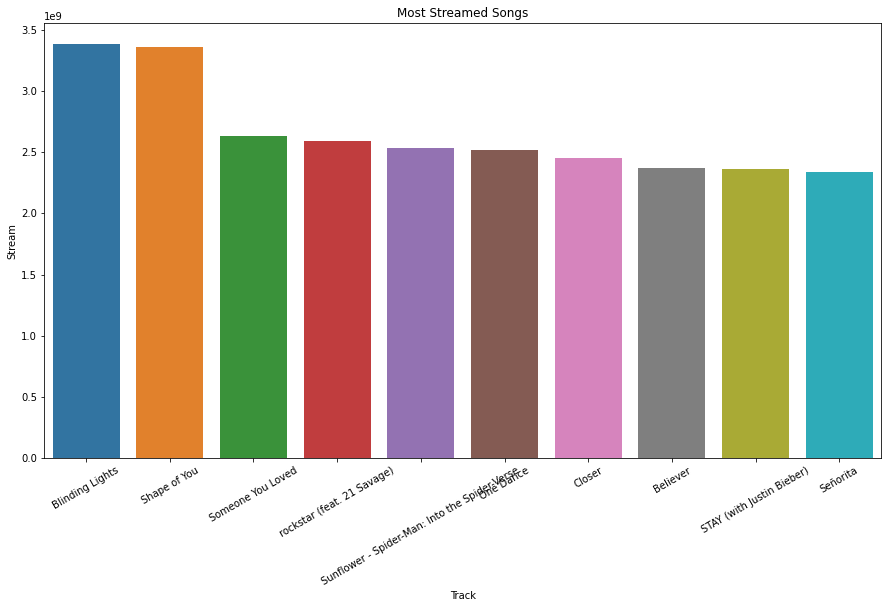

In [102]:
# Hmm, guess not. Now, let's look at the column "Stream", which is the number of Spotify streams,
# As opposed to YouTube views.

most_streamed = songs.nlargest(n=10, columns=['Stream'])

plt.figure(figsize=(15,8))
sns.barplot(x = 'Track',y = 'Stream',data = most_streamed).set(title='Most Streamed Songs')
plt.xticks(rotation=30)
plt.show()

In [103]:
streamed_titles = []
n = 0

for i in most_streamed['Title']:
    streamed_titles.append(i)
    print(streamed_titles[n])
    n += 1

The Weeknd - Blinding Lights (Official Video)
Ed Sheeran - Shape of You (Official Music Video)
Lewis Capaldi - Someone You Loved
Post Malone ft. 21 Savage - rockstar (Official Music Video)
Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse)
Drake - One Dance (Lyrics) ft. Wizkid & Kyla
The Chainsmokers - Closer (Official Video) ft. Halsey
Imagine Dragons - Believer (Official Music Video)
The Kid LAROI, Justin Bieber - STAY (Official Video)
Shawn Mendes, Camila Cabello - Señorita (Official Music Video)


In [104]:
n = 0

for i in streamed_titles:
    Hybool = streamed_titles[n] in danceable_titles
    print(f"{streamed_titles[n]} is in the most danceable list: {Hybool}")
    n += 1

The Weeknd - Blinding Lights (Official Video) is in the most danceable list: False
Ed Sheeran - Shape of You (Official Music Video) is in the most danceable list: False
Lewis Capaldi - Someone You Loved is in the most danceable list: False
Post Malone ft. 21 Savage - rockstar (Official Music Video) is in the most danceable list: False
Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse) is in the most danceable list: False
Drake - One Dance (Lyrics) ft. Wizkid & Kyla is in the most danceable list: False
The Chainsmokers - Closer (Official Video) ft. Halsey is in the most danceable list: False
Imagine Dragons - Believer (Official Music Video) is in the most danceable list: False
The Kid LAROI, Justin Bieber - STAY (Official Video) is in the most danceable list: False
Shawn Mendes, Camila Cabello - Señorita (Official Music Video) is in the most danceable list: False


In [105]:
n = 0

for i in streamed_titles:
    Hybool = streamed_titles[n] in viewed_titles
    print(f"{streamed_titles[n]} is in the most-viewed list: {Hybool}")
    n += 1

The Weeknd - Blinding Lights (Official Video) is in the most-viewed list: False
Ed Sheeran - Shape of You (Official Music Video) is in the most-viewed list: True
Lewis Capaldi - Someone You Loved is in the most-viewed list: False
Post Malone ft. 21 Savage - rockstar (Official Music Video) is in the most-viewed list: False
Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse) is in the most-viewed list: False
Drake - One Dance (Lyrics) ft. Wizkid & Kyla is in the most-viewed list: False
The Chainsmokers - Closer (Official Video) ft. Halsey is in the most-viewed list: False
Imagine Dragons - Believer (Official Music Video) is in the most-viewed list: False
The Kid LAROI, Justin Bieber - STAY (Official Video) is in the most-viewed list: False
Shawn Mendes, Camila Cabello - Señorita (Official Music Video) is in the most-viewed list: False


In [106]:
n = 0

for i in streamed_titles:
    Hybool = streamed_titles[n] in liked_titles
    print(f"{streamed_titles[n]} is in the most-liked list: {Hybool}")
    n += 1

The Weeknd - Blinding Lights (Official Video) is in the most-liked list: False
Ed Sheeran - Shape of You (Official Music Video) is in the most-liked list: True
Lewis Capaldi - Someone You Loved is in the most-liked list: False
Post Malone ft. 21 Savage - rockstar (Official Music Video) is in the most-liked list: False
Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse) is in the most-liked list: False
Drake - One Dance (Lyrics) ft. Wizkid & Kyla is in the most-liked list: False
The Chainsmokers - Closer (Official Video) ft. Halsey is in the most-liked list: False
Imagine Dragons - Believer (Official Music Video) is in the most-liked list: False
The Kid LAROI, Justin Bieber - STAY (Official Video) is in the most-liked list: False
Shawn Mendes, Camila Cabello - Señorita (Official Music Video) is in the most-liked list: False


In [107]:
# It appears that the one common denominator is Ed Sheeran's Shape of You

Number_one = songs[songs["Title"] == 'Ed Sheeran - Shape of You (Official Music Video)']
Number_one = Number_one.reset_index(drop=True)
Number_one

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,...,https://www.youtube.com/watch?v=JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5908398479,31047780,1130327,The official music video for Ed Sheeran - Shap...,True,True,3362005201


In [108]:
# Ed Sheeran's Shape of You is in the top according to # of streams, # of likes, and # of views
# But it's not the top dog in terms of danceability, but it is above average.

minimum = songs['Danceability'].min()
maximum = songs['Danceability'].max()
average = songs['Danceability'].mean()
shape_of_you = Number_one['Danceability']

print(f"Danceability:\nShape of You: {shape_of_you}\nLeast: {minimum}\nMost: {maximum}")
print(f"Average: {average}")

Danceability:
Shape of You: 0    0.825
Name: Danceability, dtype: float64
Least: 0.0
Most: 0.975
Average: 0.6179388989915657


In [109]:
# Let's look at the song that was in the top ten danceable songs, but that
# has had the highest number of streams among them
top_Danceable = most_dancy.nlargest(n=1, columns=['Stream'])
top_Danceable

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
18650,18650,DaBaby,https://open.spotify.com/artist/4r63FhuTkUYltb...,Baby (Lil Baby feat. DaBaby),Quality Control: Control The Streets Volume 2,album,spotify:track:5MPPttjfGap2C6j6eKcO6J,0.97,0.463,10.0,...,https://www.youtube.com/watch?v=0GbwYFqN1iE,"Quality Control, Lil Baby, & DaBaby - ""Baby"" (...",QualityControlVEVO,134859097,1184063,29249,The official music video for Lil Baby & DaBaby...,True,True,389570923


In [110]:
top = [top_Danceable, Number_one]
top = pd.concat(top)
top

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
18650,18650,DaBaby,https://open.spotify.com/artist/4r63FhuTkUYltb...,Baby (Lil Baby feat. DaBaby),Quality Control: Control The Streets Volume 2,album,spotify:track:5MPPttjfGap2C6j6eKcO6J,0.970,0.463,10.0,...,https://www.youtube.com/watch?v=0GbwYFqN1iE,"Quality Control, Lil Baby, & DaBaby - ""Baby"" (...",QualityControlVEVO,134859097,1184063,29249,The official music video for Lil Baby & DaBaby...,True,True,389570923
0,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,...,https://www.youtube.com/watch?v=JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5908398479,31047780,1130327,The official music video for Ed Sheeran - Shap...,True,True,3362005201


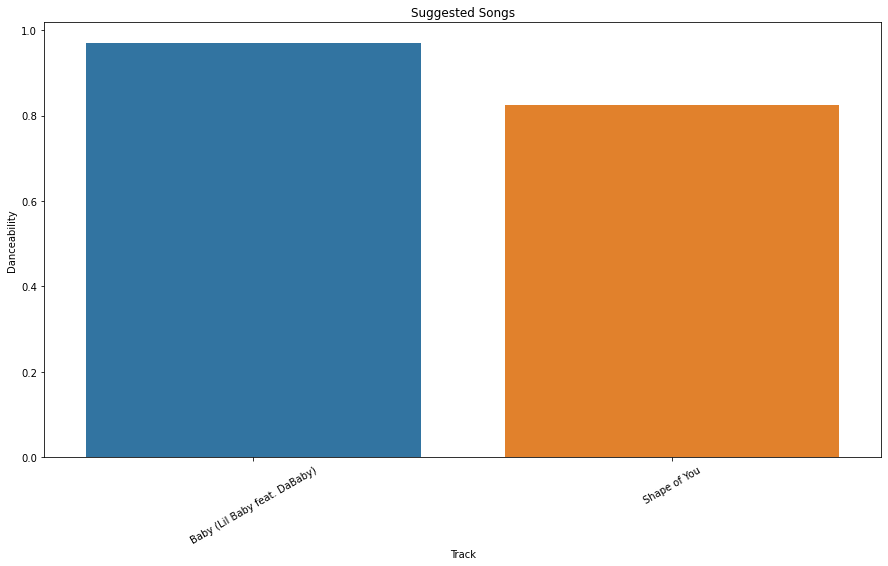

In [111]:
# In conclusion, if you're looking for something that more people will enjoy,
# best to go with Shape of You
# If you're looking for something more danceable, then maybe the other one.

# I don't particularly like either song, so I'm probably just going to send in my RSVP without a song request
plt.figure(figsize=(15,8))
sns.barplot(x = 'Track',y = 'Danceability',data = top).set(title='Suggested Songs')
plt.xticks(rotation=30)
plt.show()